In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(10,8)}
        )

In [16]:
taxi = pd.read_csv('3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [17]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


**Проверьте, с какой платформы было сделано больше всего заказов. 
В ответе укажите значение в %, округлённое до целого.**

In [18]:
taxi\
    .value_counts('source', normalize=True)\
    .mul(100)\
    .round()

source
iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
dtype: float64

**Чтобы показать разницу более наглядно, попробуем визуализировать показатели.
Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source),
а по оси y – количество заказов (абсолютные значения).**

In [19]:
taxi_source = taxi\
    .groupby('source', as_index=False)\
    .agg({'journey_id': 'count'})\
    .rename(columns={'journey_id': 'drive_count'})\
    .sort_values('drive_count', ascending=False)

In [20]:
taxi_source

,source,drive_count
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


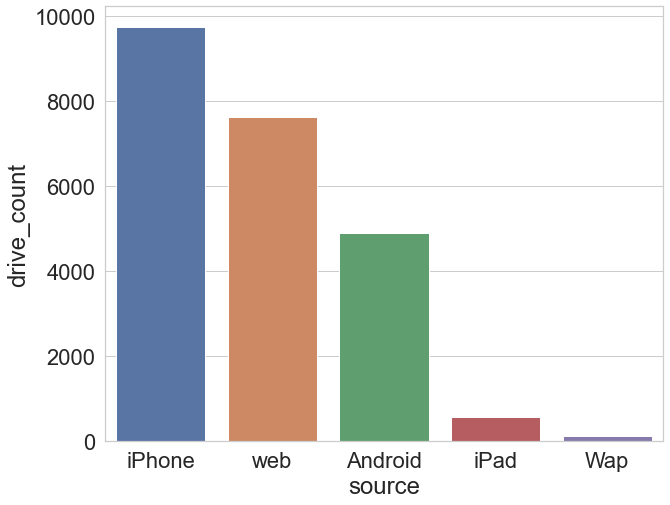

In [21]:
ax = sns.barplot(x='source', y='drive_count', data=taxi_source)

**Альтернативный вариант построения распределения категориальной переменной – sns.countplot. 
В качестве единственного аргумента можно передать всего одну колонку: например, source, 
а количество значений для оси y функция посчитает самостоятельно.
Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.**

<AxesSubplot:xlabel='icon', ylabel='count'>

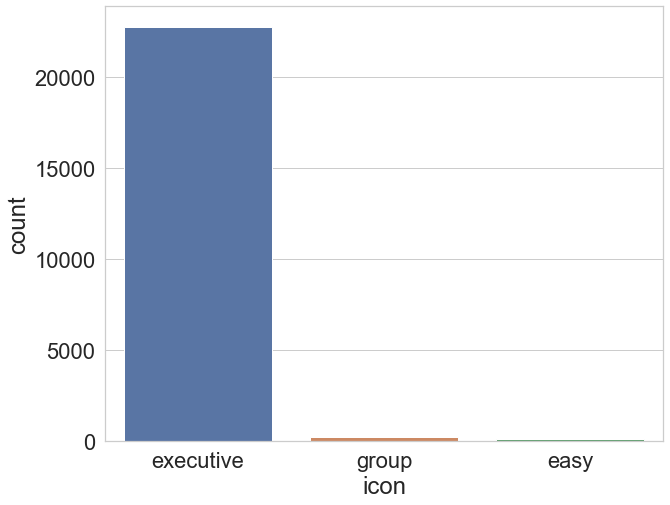

In [22]:
sns.countplot(x='icon', data = taxi)

**Теперь попробуем построить более сложный график!
С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) 
в разбивке по платформам (source).Иными словами, по оси x расположите платформу, 
а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.**

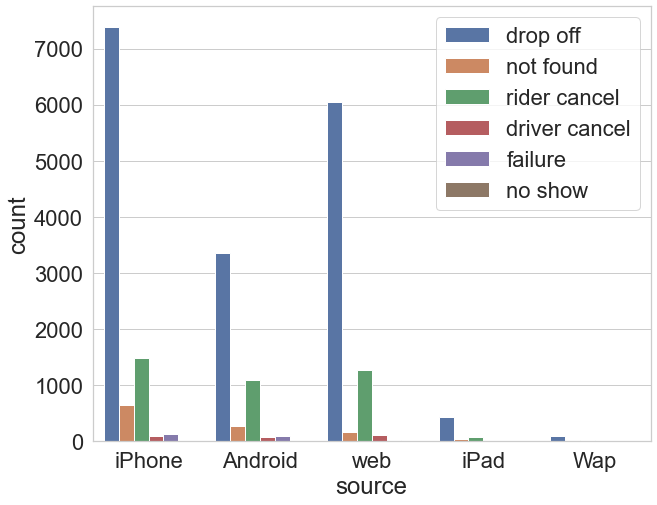

In [26]:
state = sns.countplot(x='source', hue='end_state', data=taxi)
plt.legend(loc='upper right') # перенес легенду вправо

**Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:**
1. Посчитайте частоту встречаемости каждой из оценок
2. Переведите в проценты и округлите до 2 знаков после точки
3. Сбросьте индексы
4. Переименуйте колонки в driver_score и percentage.
5. Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
6. Запишите результат в driver_score_counts


In [39]:
driver_score_counts = taxi\
    .value_counts('driver_score', normalize=True)\
    .mul(100)\
    .round(2)\
    .reset_index()\
    .rename(columns={0: 'percentage'})\
    .sort_values('driver_score')

In [40]:
driver_score_counts

,driver_score,percentage
2,0.0,14.28
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.89
0,5.0,58.82


**Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?**

In [29]:
rider_score_counts = taxi\
    .value_counts('rider_score', normalize=True)\
    .mul(100)\
    .round(2)\
    .reset_index()\
    .rename(columns={0: 'percentage'})\
    .sort_values('rider_score')

In [30]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


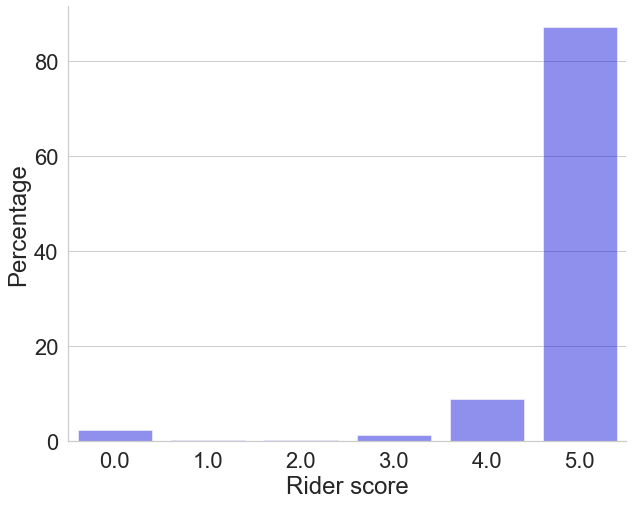

In [31]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage') # задание лейблов
sns.despine()  # убрать часть рамки графика
plt.show()

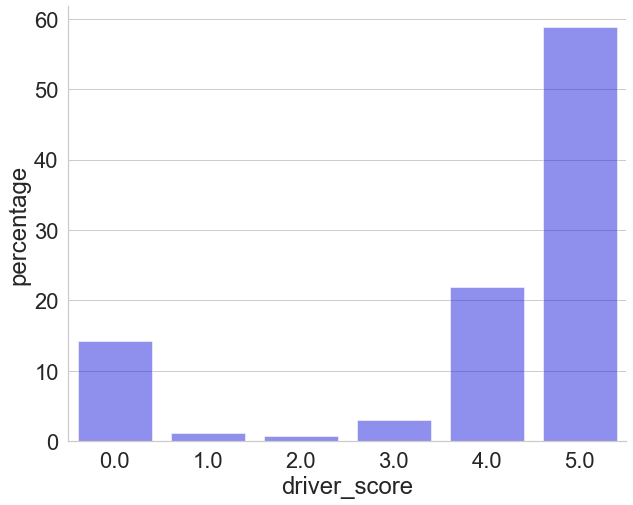

In [32]:
ax_2 = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage') # задание лейблов
sns.despine()  # убрать часть рамки графика
plt.show()

**home_work from lesson_4
Приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). 
Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" "reserved" (start_type)**

In [33]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

In [34]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

**Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) 
и временем заказа (start_at) в минутах.**

In [37]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')

C:\Users\Caesar\AppData\Local\Temp/ipykernel_5772/511731877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')


In [38]:
taxi[['arrived_at', 'start_at', 'wait_time']].head(10)

,arrived_at,start_at,wait_time
0,2010-11-16 17:02:00,2010-11-16 16:44:00,18.0
1,NaT,2010-06-01 00:34:00,NaN
2,NaT,2010-05-31 05:01:00,NaN
3,NaT,2010-06-01 00:29:00,NaN
4,2010-09-11 23:50:00,2010-09-11 23:55:00,-5.0
5,2010-08-10 12:53:00,2010-08-10 13:00:00,-7.0
6,2010-08-08 12:01:00,2010-08-08 12:10:00,-9.0
7,2010-05-16 04:06:00,2010-05-16 03:58:00,8.0
8,2010-07-09 06:13:00,2010-07-09 05:56:00,17.0
9,2010-11-23 00:05:00,2010-11-22 23:42:00,23.0


**Посмотрим, какие водители опаздывали на заказы к определенному времени. 
Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, 
который опоздал на заказ интересующего нас типа наибольшее число раз**

In [41]:
most_late_driver = taxi\
    .query('start_type == "reserved" and wait_time > 0.0')\
    .groupby('driver_id')\
    .agg({'journey_id': 'count'})\
    .rename(columns={'journey_id': 'late_drivers'})\
    .idxmax()

In [42]:
most_late_driver

late_drivers    406921adcca37705ef527b4246c0cfea
dtype: object

In [43]:
# OR

In [44]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0.0)].driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

**Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  
и столбец weekday – название дня недели.**

In [45]:
taxi['month'] = taxi['start_at'].dt.strftime('%m').astype('int')

C:\Users\Caesar\AppData\Local\Temp/ipykernel_5772/30908380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['month'] = taxi['start_at'].dt.strftime('%m').astype('int')


In [46]:
taxi['month'].head()

0    11
1     6
2     5
3     6
4     9
Name: month, dtype: int32

In [47]:
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

C:\Users\Caesar\AppData\Local\Temp/ipykernel_5772/1690324763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['weekday'] = taxi['start_at'].dt.strftime('%A')


In [48]:
taxi['weekday'].head()

0     Tuesday
1     Tuesday
2      Monday
3     Tuesday
4    Saturday
Name: weekday, dtype: object

**Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).**

<AxesSubplot:xlabel='month', ylabel='count'>

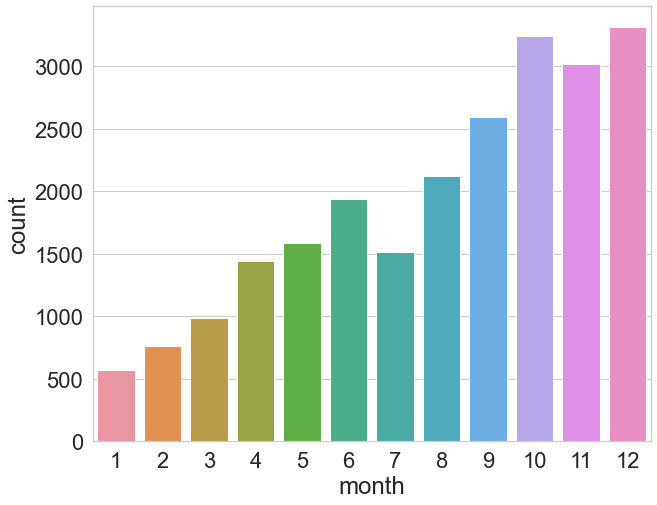

In [49]:
sns.countplot(x='month', data=taxi)

**А теперь – график по дням недели (weekday)
В какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.**

<AxesSubplot:xlabel='weekday', ylabel='count'>

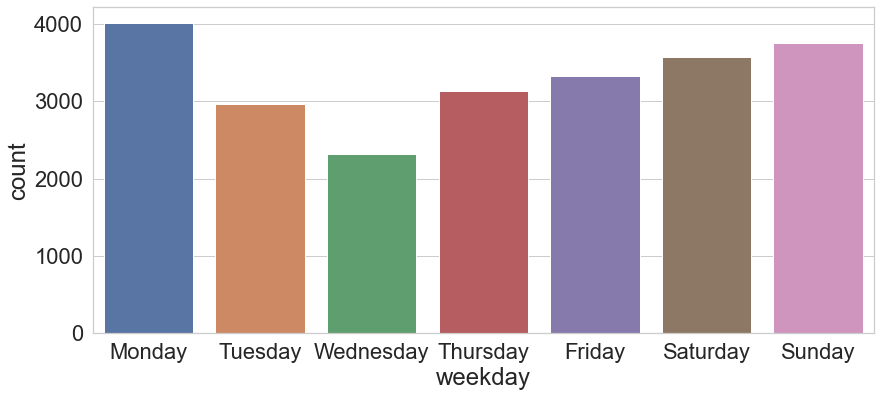

In [59]:
plt.figure(figsize=(14, 6))
sns.countplot(x='weekday', data=taxi, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

**Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. 
Постройте график MAU**

<AxesSubplot:xlabel='month', ylabel='user_id'>

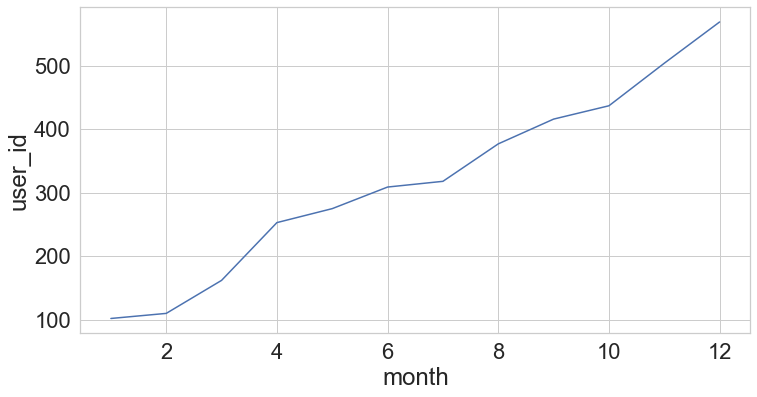

In [60]:
MAU = taxi\
    .groupby('month')\
    .agg({'user_id': 'nunique'})
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='user_id', data=MAU)